# Exploration

In this analysis, we are going to preprocess the data by combining two datasets. Each dataset contains valuable information, but both have missing values in different areas. By merging the two, we can leverage the strengths of each dataset, filling in gaps and ensuring we have a more complete and comprehensive set of data for our analysis. This approach allows us to mitigate the impact of missing values and create a more robust dataset that complements well across different time periods and data points.

## Data Preprocessing

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Read csv files into dataframes

In [41]:
data_folder = "data/"
matches = "atp_2000_17/"
rankings = "atp_rankings/"

atp1 = pd.read_csv(data_folder + matches + "atp_matches_2000.csv")
atp2 = pd.read_csv(data_folder + matches + "atp_matches_2001.csv")
atp3 = pd.read_csv(data_folder + matches + "atp_matches_2002.csv")
atp4 = pd.read_csv(data_folder + matches + "atp_matches_2003.csv")
atp5 = pd.read_csv(data_folder + matches + "atp_matches_2004.csv")
atp6 = pd.read_csv(data_folder + matches + "atp_matches_2005.csv")
atp7 = pd.read_csv(data_folder + matches + "atp_matches_2006.csv")
atp8 = pd.read_csv(data_folder + matches + "atp_matches_2007.csv")
atp9 = pd.read_csv(data_folder + matches + "atp_matches_2008.csv")
atp10 = pd.read_csv(data_folder + matches + "atp_matches_2009.csv")
atp11 = pd.read_csv(data_folder + matches + "atp_matches_2010.csv")
atp12 = pd.read_csv(data_folder + matches + "atp_matches_2011.csv")
atp13 = pd.read_csv(data_folder + matches + "atp_matches_2012.csv")
atp14 = pd.read_csv(data_folder + matches + "atp_matches_2013.csv")
atp15 = pd.read_csv(data_folder + matches + "atp_matches_2014.csv")
atp16 = pd.read_csv(data_folder + matches + "atp_matches_2015.csv")
atp17 = pd.read_csv(data_folder + matches + "atp_matches_2016.csv")

atp19 = pd.read_csv(data_folder + rankings + "atp_matches_till_2022.csv")
atp20 = pd.read_csv(data_folder + rankings + "atp_matches_till_2022.csv")

# filter years for last two
atp19 = atp19[atp19['tourney_id'].str[:4].isin(['2017', '2018', '2019'])]
atp20 = atp20[atp20['tourney_id'].str[:4].isin(['1998', '1999'])]

Combine data into one big dataframe

In [42]:
atp = pd.concat([atp1, atp2, atp3, atp4, atp5, atp6, atp7, atp8, atp9, atp10, atp11, atp12, atp13, atp14, atp15, atp16, atp17, atp19, atp20])

In [43]:
# Extract year from the 'tourney_id' column and create a 'year' column
atp['year'] = atp['tourney_id'].str[:4]
atp = atp.sort_values(by='year')

# Filter the data for the three GOAT candidates
atp_goats = atp[(atp['winner_name'].isin(["Roger Federer", "Novak Djokovic", "Rafael Nadal"])) |
                (atp['loser_name'].isin(["Roger Federer", "Novak Djokovic", "Rafael Nadal"]))]

# Convert the 'tourney_date' column to datetime format
atp_goats['tourney_date'] = pd.to_datetime(atp_goats['tourney_date'], errors='coerce')

# Optionally, drop any rows with missing values
atp_goats = atp_goats.dropna(subset=['tourney_date'])

/var/folders/xk/r2z0cjlx76x3d1cbccmvznb80000gn/T/ipykernel_95569/2525749873.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atp_goats['tourney_date'] = pd.to_datetime(atp_goats['tourney_date'], errors='coerce')


In [44]:
atp_goats.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year
114422,1998-314,Gstaad,Clay,32,A,1970-01-01 00:00:00.019980706,2.0,102463,NaN,LL,...,1.0,3.0,74.0,36.0,24.0,15.0,10.0,1.0,5.0,1998
115478,1998-327,Toulouse,Hard,32,A,1970-01-01 00:00:00.019980928,14.0,103819,NaN,Q,...,0.0,0.0,65.0,36.0,22.0,11.0,8.0,4.0,8.0,1998
115487,1998-327,Toulouse,Hard,32,A,1970-01-01 00:00:00.019980928,23.0,103819,NaN,Q,...,9.0,4.0,75.0,39.0,30.0,16.0,9.0,8.0,10.0,1998
115500,1998-328,Basel,Hard,32,A,1970-01-01 00:00:00.019981005,5.0,101736,4.0,NaN,...,4.0,2.0,53.0,31.0,20.0,7.0,8.0,4.0,8.0,1998
115492,1998-327,Toulouse,Hard,32,A,1970-01-01 00:00:00.019980928,28.0,101733,2.0,NaN,...,3.0,6.0,67.0,39.0,27.0,14.0,10.0,7.0,10.0,1998


## Who performed best on each surface ?

In [45]:
atp_goats['winner_name'].value_counts()

winner_name
Roger Federer         1230
Rafael Nadal           947
Novak Djokovic         839
Andy Murray             27
Jo Wilfried Tsonga      17
                      ... 
Sjeng Schalken           1
Davide Sanguinetti       1
Felix Mantilla           1
Juan Monaco              1
Lucas Arnold Ker         1
Name: count, Length: 172, dtype: int64

In [46]:
atp_goats.surface.value_counts()

surface
Hard      2073
Clay       953
Grass      392
Carpet      90
Name: count, dtype: int64

In [47]:
atp_clay = atp_goats.loc[atp_goats.surface == 'Clay']
atp_hard = atp_goats.loc[atp_goats.surface == 'Hard']
atp_grass = atp_goats.loc[atp_goats.surface == 'Grass']
atp_carpet = atp_goats.loc[atp_goats.surface == 'Carpet']

In [48]:
# Federer, Nadal, and Djokovic wins on Clay
federer_clay_wins = atp_clay[atp_clay['winner_name'] == 'Roger Federer']
federer_clay_wins_count = federer_clay_wins['tourney_id'].nunique()

rafa_clay_wins = atp_clay[atp_clay['winner_name'] == 'Rafael Nadal']
rafa_clay_wins_count = rafa_clay_wins['tourney_id'].nunique()

djokovic_clay_wins = atp_clay[atp_clay['winner_name'] == 'Novak Djokovic']
djokovic_clay_wins_count = djokovic_clay_wins['tourney_id'].nunique()

# Federer, Nadal, and Djokovic wins on Hard
federer_hard_wins = atp_hard[atp_hard['winner_name'] == 'Roger Federer']
federer_hard_wins_count = federer_hard_wins['tourney_id'].nunique()

rafa_hard_wins = atp_hard[atp_hard['winner_name'] == 'Rafael Nadal']
rafa_hard_wins_count = rafa_hard_wins['tourney_id'].nunique()

djokovic_hard_wins = atp_hard[atp_hard['winner_name'] == 'Novak Djokovic']
djokovic_hard_wins_count = djokovic_hard_wins['tourney_id'].nunique()

# Federer, Nadal, and Djokovic wins on Grass
federer_grass_wins = atp_grass[atp_grass['winner_name'] == 'Roger Federer']
federer_grass_wins_count = federer_grass_wins['tourney_id'].nunique()

rafa_grass_wins = atp_grass[atp_grass['winner_name'] == 'Rafael Nadal']
rafa_grass_wins_count = rafa_grass_wins['tourney_id'].nunique()

djokovic_grass_wins = atp_grass[atp_grass['winner_name'] == 'Novak Djokovic']
djokovic_grass_wins_count = djokovic_grass_wins['tourney_id'].nunique()

# Federer, Nadal, and Djokovic wins on Carpet
federer_carpet_wins = atp_carpet[atp_carpet['winner_name'] == 'Roger Federer']
federer_carpet_wins_count = federer_carpet_wins['tourney_id'].nunique()

rafa_carpet_wins = atp_carpet[atp_carpet['winner_name'] == 'Rafael Nadal']
rafa_carpet_wins_count = rafa_carpet_wins['tourney_id'].nunique()

djokovic_carpet_wins = atp_carpet[atp_carpet['winner_name'] == 'Novak Djokovic']
djokovic_carpet_wins_count = djokovic_carpet_wins['tourney_id'].nunique()

In [49]:
# Data for the plots for each surface
data_clay = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_clay_wins_count, rafa_clay_wins_count, djokovic_clay_wins_count]
}

data_hard = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_hard_wins_count, rafa_hard_wins_count, djokovic_hard_wins_count]
}

data_grass = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_grass_wins_count, rafa_grass_wins_count, djokovic_grass_wins_count]
}

data_carpet = {
    'Player': ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'],
    'Wins': [federer_carpet_wins_count, rafa_carpet_wins_count, djokovic_carpet_wins_count]
}

# Create DataFrames
df = pd.DataFrame(data_clay)
df_hard = pd.DataFrame(data_hard)
df_grass = pd.DataFrame(data_grass)
df_carpet = pd.DataFrame(data_carpet)

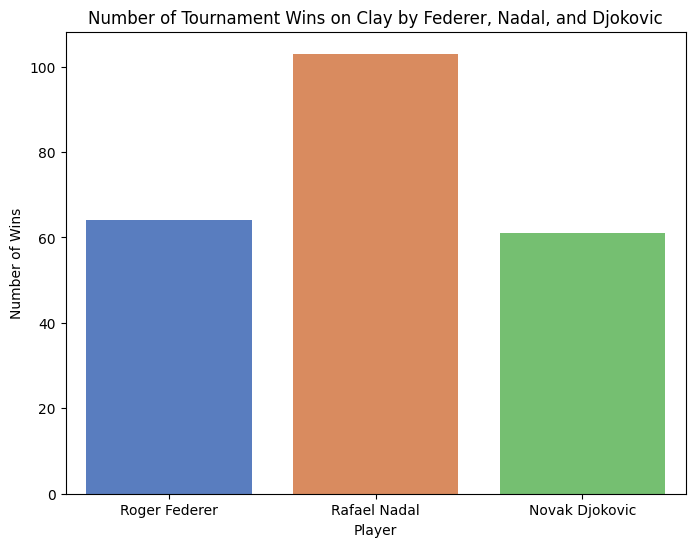

In [50]:
# Create the seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df, hue='Player', palette='muted', legend=False)

# Add labels and title
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Clay by Federer, Nadal, and Djokovic')

# Show the plot
plt.show()

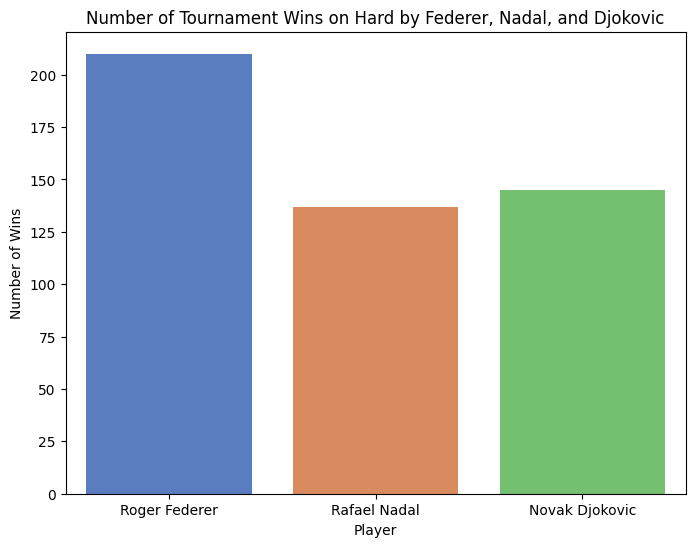

In [51]:
# Plot for Hard
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df_hard, hue='Player', palette='muted', legend=False)
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Hard by Federer, Nadal, and Djokovic')
plt.show()

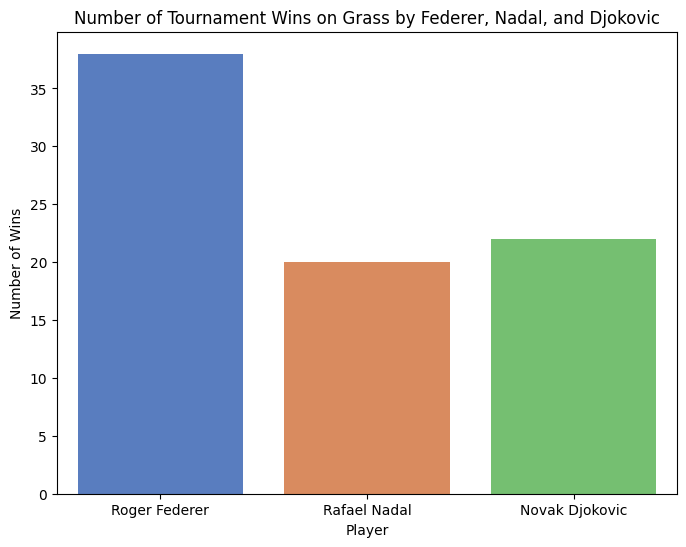

In [52]:
# Plot for Grass
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df_grass, hue='Player', palette='muted', legend=False)
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Grass by Federer, Nadal, and Djokovic')
plt.show()

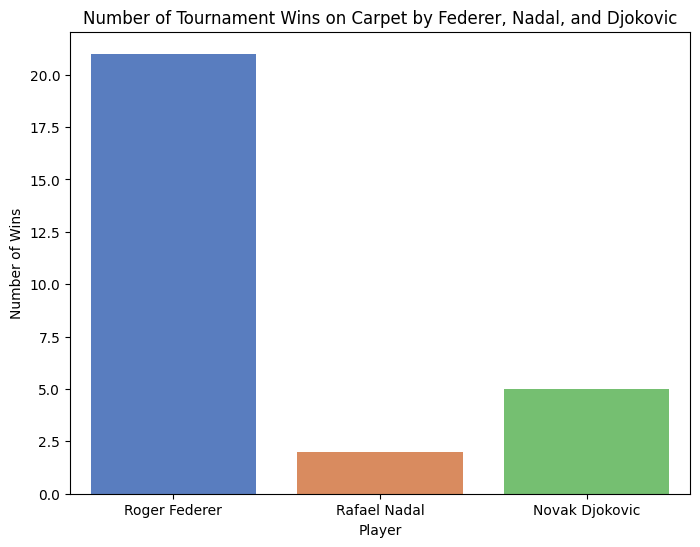

In [53]:
# Plot for Carpet
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Wins', data=df_carpet, hue='Player', palette='muted', legend=False)
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.title('Number of Tournament Wins on Carpet by Federer, Nadal, and Djokovic')
plt.show()

## Who won the most Grand Slams ?

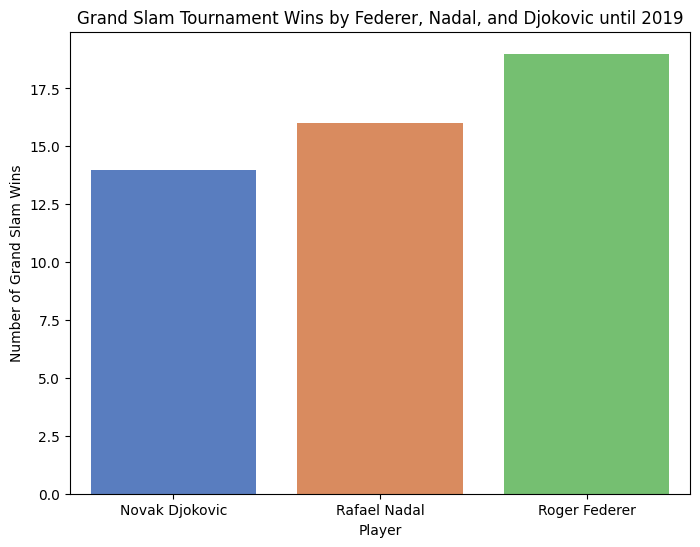

,Player,Grand Slam Wins
0,Novak Djokovic,14
1,Rafael Nadal,16
2,Roger Federer,19


In [66]:
# Filter the dataset for Grand Slam tournaments (tourney_level == "G")
grand_slams = atp_goats[atp_goats['tourney_level'] == 'G']

# Select the relevant columns: tournament name, winner name, year
grand_slams = grand_slams[['tourney_name', 'winner_name', 'year']]

# Fix the naming of the US Open
grand_slams['tourney_name'] = grand_slams['tourney_name'].replace("Us Open", "US Open")

# Count the number of wins for each player (Federer, Nadal, Djokovic)
wins_count = grand_slams[grand_slams['winner_name'].isin(['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'])]
wins_count = wins_count.groupby('winner_name')['year'].nunique().reset_index()

# Rename the columns for clarity
wins_count.columns = ['Player', 'Grand Slam Wins']

# Create a bar plot of the Grand Slam wins
plt.figure(figsize=(8, 6))
sns.barplot(x='Player', y='Grand Slam Wins', data=wins_count, hue='Player', palette='muted', legend=False)

# Add labels and title
plt.xlabel('Player')
plt.ylabel('Number of Grand Slam Wins')
plt.title('Grand Slam Tournament Wins by Federer, Nadal, and Djokovic until 2019')

# Show the plot
plt.show()

# Display the number of Grand Slam wins
wins_count

In [61]:
atp_goats[atp_goats['tourney_level'] == 'G'].year.value_counts()

year
2011    71
2010    70
2019    69
2008    69
2007    68
2014    63
2018    62
2015    62
2012    62
2009    62
2006    57
2013    57
2017    55
2005    50
2004    29
2003    21
2001    17
2000    11
2002    10
1999     2
Name: count, dtype: int64

In [62]:
grand_slams.head()

,tourney_name,winner_name,tourney_date
117832,Wimbledon,Jiri Novak,1970-01-01 00:00:00.019990621
117524,Roland Garros,Patrick Rafter,1970-01-01 00:00:00.019990524
2883,Roland Garros,Roger Federer,1970-01-01 00:00:00.020000529
2863,Roland Garros,Roger Federer,1970-01-01 00:00:00.020000529
2893,Roland Garros,Alex Corretja,1970-01-01 00:00:00.020000529
